This notebook was written and used on a local machine and doesn't require CUDA or CUDNN. This notebook displays the training images with its bounding boxes by reading its text annotation file. It uses openCV.

## Installations and Importations

In [2]:
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline

## Variables to be modifed accordingly

In [3]:
# Path to folder containing all images (IT must also contain the .txt file annotations of the images present)
Folder_path = 'Yolo_builds/Colour_Helmet_detection/Data_set/Images_and_annotations'

Classes = ['Blue', 'Yellow', 'White', 'Red', 'None'] #Classes
#Colors for each class-[0,255]
COLORS = np.array([[255,0.1,0.1,],[0.1,254.9,254.9],[254.9,254.9,254.9],[0.1,0.1,254.9],[0.1,0.1,0.1]])

## Get the image data

In [6]:
# Get txt and img files in given folder in seperate lists
TXT_files = []
IMG_files = []
for file in os.listdir(Folder_path):
    if file.endswith('.txt'):
        TXT_files.append(file)
    else:
        IMG_files.append(file)
        
TXT_files = TXT_files[20:30]
IMG_files = IMG_files[20:30]
print(TXT_files)
print(IMG_files)
print('No of files = ',len(IMG_files))



# The image parameters to be considered for all images in the observed data
Width = 416
Height = 416
scale = 1/255

# Store all images into a list(also display them..)
IMAGES = []
for filename in IMG_files:
    image = cv.imread(Folder_path + '/' + filename)
    IMAGES.append(cv.resize(image, (Width, Height)))

['00020.txt', '00021.txt', '00022.txt', '00023.txt', '00024.txt', '00025.txt', '00026.txt', '00027.txt', '00028.txt', '00029.txt']
['00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg']
No of files =  10


# Draw the boxes

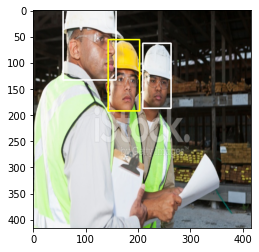

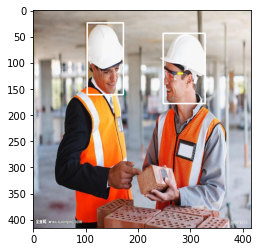

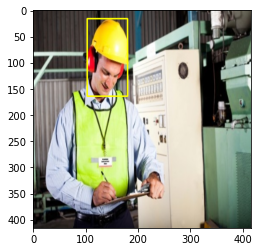

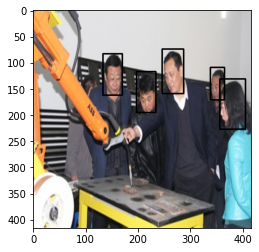

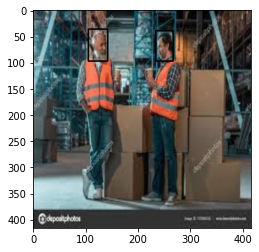

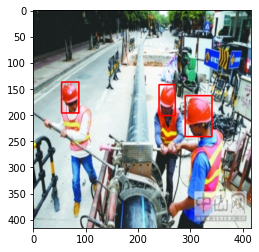

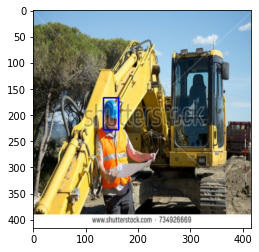

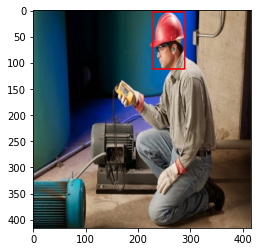

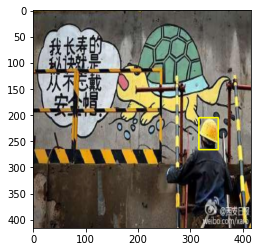

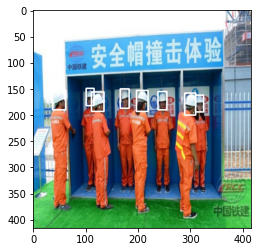

In [13]:
for i in range(len(IMAGES)):
    image = np.copy(IMAGES[i]) #Get image, copy to prevent modifying original image
    
    with open(Folder_path + '/' + TXT_files[i]) as f:
        lines = f.readlines() #Read all TXT line for corresponding image
        
    for line in lines: #For each line
        #Get the box values in proper 'type'
        box = [float(value) for value in line.split()]
        x = int(Width * (box[1]-box[3]/2))
        y = int(Height * (box[2]-box[4]/2))
        x_plus_w = int(Width * (box[1]+box[3]/2))
        y_plus_h = int(Height * (box[2]+box[4]/2))
        
        #Get class colour of given box
        color = COLORS[int(box[0])]

        #Overlap the box on the image
        cv.rectangle(image, (x,y), (x_plus_w,y_plus_h), color, 2)
        
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert BGR numpy-array-image format to RGB
    plt.figure()
    plt.imshow(image)